In [184]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.utils import resample

In [185]:
def keepOnlyChars(str):
    return " ".join(re.findall("[A-Za-z]+",str))

def removeHtmlTgs(str):
    return re.sub("<[^>]+>", "", str)

def keepOnlyAscii(str):
    return re.sub(r'[^\x00-\x7f]',r'', str)

In [186]:
train_data = []
data_files = ['Youtube01-Psy.csv','Youtube02-KatyPerry.csv','Youtube03-LMFAO.csv','Youtube04-Eminem.csv','Youtube05-Shakira.csv']
for file in data_files:
    data = pd.read_csv("./data/" + file)
    train_data.append(data)

In [187]:
train_data = pd.concat(train_data)
train_data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [188]:
train_data = train_data.drop(['COMMENT_ID','AUTHOR','DATE'], axis=1, inplace=False)
train_data.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [189]:
train_data[train_data['CONTENT'].isna()]

,CONTENT,CLASS


In [190]:
sms_data = pd.read_csv('./data/SMSSpamCollection.csv')
sms_data.head()

,CLASS,CONTENT
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [191]:
sms_data['CLASS'] = sms_data['CLASS'].apply(lambda el: 0 if el == 'ham' else 1)

In [192]:
sms_data.head()

,CLASS,CONTENT
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [193]:
sms_data = sms_data[['CONTENT', 'CLASS']]
sms_data.head()

,CONTENT,CLASS
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [194]:
sms_data['CLASS'].value_counts()

0    4825
1     747
Name: CLASS, dtype: int64

In [195]:
sms_data[sms_data['CONTENT'].isna()]

,CONTENT,CLASS


In [196]:
train_data.shape, sms_data.shape

((1956, 2), (5572, 2))

In [197]:
train_data = pd.concat([train_data, sms_data])
train_data.shape

(7528, 2)

In [198]:
train_data = train_data[['CONTENT', 'CLASS']]

In [199]:
train_data['CONTENT'].describe()

count                                  7528
unique                                 6917
top       Check out this video on YouTube:﻿
freq                                     97
Name: CONTENT, dtype: object

In [200]:
keepOnlyAscii("11eyes 6話視聴終了")

'11eyes 6'

In [201]:
train_data["FORMATTED_CONTENT"] = train_data["CONTENT"].apply(removeHtmlTgs)
train_data["FORMATTED_CONTENT"] = train_data["CONTENT"].apply(keepOnlyAscii)

In [202]:
train_data = train_data.drop(["CONTENT"], axis=1, inplace=False)
train_data.head()

,CLASS,FORMATTED_CONTENT
0,1,"Huh, anyway check out this you[tube] channel: ..."
1,1,Hey guys check out my new channel and our firs...
2,1,just for test I have to say murdev.com
3,1,me shaking my sexy ass on my channel enjoy ^_^
4,1,watch?v=vtaRGgvGtWQ Check this out .


In [204]:
train_data['CLASS'].value_counts()

0    5776
1    1752
Name: CLASS, dtype: int64

In [205]:
twt_data = pd.read_csv("./data/spammers_tweets.txt", sep="	")
twt_data.head()

,id,id2,twwet,timestamp
0,6301,5599519501,MELBOURNE ENQUIRY: Seeking a variety of acts f...,2009-11-10 15:14:31
1,6301,5600313663,THE BURLESQUE BOOTCAMP SYDNEY - Open Date tick...,2009-11-10 15:46:05
2,6301,5600328557,THE BURLESQUE BOOTCAMP SYDNEY - Open Date tick...,2009-11-10 15:46:40
3,6301,5600338093,THE BURLESQUE BOOTCAMP SYDNEY - Open Date tick...,2009-11-10 15:47:03
4,6301,5600564863,"Come to ""The Burlesque Bootcamp - Sydney"" Satu...",2009-11-10 15:56:03


In [206]:
twt_data = twt_data.drop(columns=['id', 'id2', 'timestamp'])
twt_data['CLASS'] = 1
twt_data.head()

,twwet,CLASS
0,MELBOURNE ENQUIRY: Seeking a variety of acts f...,1
1,THE BURLESQUE BOOTCAMP SYDNEY - Open Date tick...,1
2,THE BURLESQUE BOOTCAMP SYDNEY - Open Date tick...,1
3,THE BURLESQUE BOOTCAMP SYDNEY - Open Date tick...,1
4,"Come to ""The Burlesque Bootcamp - Sydney"" Satu...",1


In [207]:
twt_data[twt_data['twwet'].isna()]

,twwet,CLASS


In [208]:
twt_data_downsampled = resample(twt_data, replace=False, n_samples=4024, random_state=123)
len(twt_data_downsampled)

4024

In [209]:
twt_data_downsampled["FORMATTED_CONTENT"] = twt_data_downsampled["twwet"].apply(removeHtmlTgs)
twt_data_downsampled["FORMATTED_CONTENT"] = twt_data_downsampled["twwet"].apply(keepOnlyAscii)

In [210]:
twt_data_downsampled.drop(columns=['twwet'], inplace=True)
twt_data_downsampled = twt_data_downsampled[['FORMATTED_CONTENT', 'CLASS']]

In [211]:
train_data = pd.concat([train_data, twt_data_downsampled])
train_data.shape

(11552, 2)

In [212]:
train_data["FORMATTED_CONTENT"] = train_data["FORMATTED_CONTENT"].apply(keepOnlyChars)

In [213]:
train_data = train_data.sample(frac=1).reset_index(drop=True)

In [214]:
train_data["CLASS"].value_counts()

1    5776
0    5776
Name: CLASS, dtype: int64

<AxesSubplot:xlabel='CLASS'>

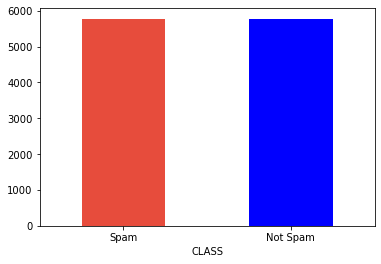

In [215]:
pd.DataFrame({"CLASS": ["Spam", "Not Spam"], "COUNT": train_data["CLASS"].value_counts()}).plot.bar(x="CLASS", y="COUNT", rot=0, legend=False, color=["#e74c3c", "blue"])

In [219]:
train_data.tail()

,CLASS,FORMATTED_CONTENT
11547,1,Oil Gold ES Lay one chart on top of each other...
11548,0,Go to write msg Put on Dictionary mode Cover t...
11549,0,Tonight Yeah I d be down for that
11550,1,Like my page please https m facebook com Dread...
11551,1,L Hawkins lol the gospel of Mr Baur That s som...


In [217]:
train_data[train_data['FORMATTED_CONTENT'].isna()]

,CLASS,FORMATTED_CONTENT


In [218]:
train_data = train_data.sample(frac=1).reset_index(drop=True)

In [220]:
train_data = train_data[['FORMATTED_CONTENT', 'CLASS']]
train_data.to_csv('./data/Final-Dataset.csv')